**<h1>Prediction of Default of Credit Card**


**Content**

There are 25 variables:

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit


SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

## Loading the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Uploading the dataset

In [2]:
df = pd.read_excel("TaiwanCreditDefaults.xls")

In [3]:
df1 = df.copy()
df1.copy()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
#changing the name of  pay_0 column to pay_1 to make the numbering correct
df1.rename(columns={'PAY_0':'PAY_1'}, inplace=True)

## Descriptive Statistics

In [5]:
df1.shape

(30000, 25)

In [6]:
df1.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [7]:
df1.describe(include="all")

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [9]:
df1.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

## Exploratory Data Analysis

### Univariate Analysis

#### > 'default payment next month' [ Default payment (1=yes, 0=no)]

In [10]:
df1["default payment next month"].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [11]:
df1["default payment next month"].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

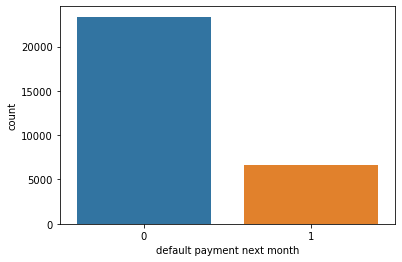

In [12]:
sns.countplot(x = "default payment next month", data = df1)
plt.show()

#### > 'SEX: Gender (1=male, 2=female)'

In [13]:
df1["SEX"].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

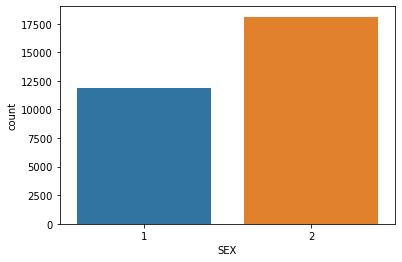

In [14]:
sns.countplot(df1["SEX"])

#### > 'EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)'

In [15]:
df1["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

We replace the 'unknown' with 'others'

In [16]:
df1["EDUCATION"].replace(0,4,inplace=True)
df1["EDUCATION"].replace(5,4,inplace=True)
df1["EDUCATION"].replace(6,4,inplace=True)

In [17]:
df1["EDUCATION"].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

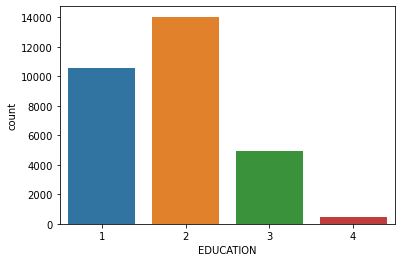

In [18]:
sns.countplot(df1["EDUCATION"])

#### > 'MARRIAGE: Marital status (1=married, 2=single, 3=others)'

In [19]:
df1["MARRIAGE"].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

In [20]:
df1["MARRIAGE"].replace(0,3,inplace=True)

In [21]:
df1.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

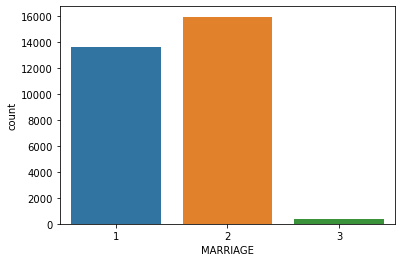

In [22]:
sns.countplot(df1.MARRIAGE)

#### 'AGE: Age in years'

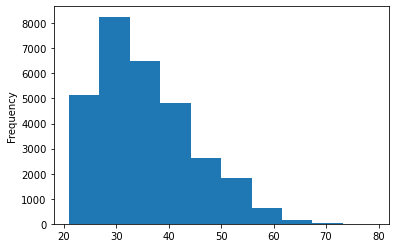

In [23]:
df1["AGE"].plot(kind="hist")
plt.show()

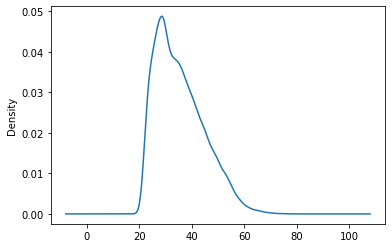

In [24]:
df1.AGE.plot(kind="density")
plt.show()

#### > 'LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)'

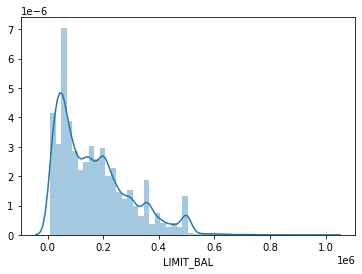

In [25]:
sns.distplot(df1["LIMIT_BAL"])
plt.show()

### Bivariate Analysis

#### 'SEX' and 'default payment next month'

In [26]:
pd.crosstab(df1["SEX"],df1["default payment next month"])

default payment next month,0,1
SEX,,
1,9015,2873
2,14349,3763


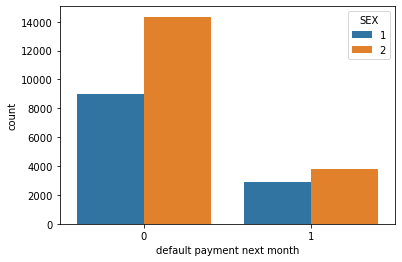

In [27]:
sns.countplot(x = "default payment next month", hue = "SEX", data = df1)
plt.show()

#### 'EDUCATION' and 'default payment next month'

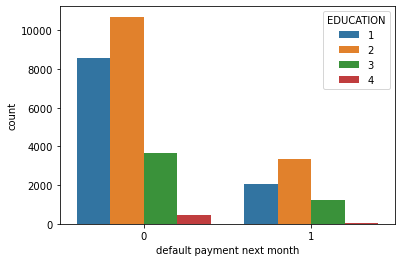

In [28]:
sns.countplot(x = "default payment next month", hue = "EDUCATION", data = df1)
plt.show()

#### 'MARRIAGE' and 'default payment next month'

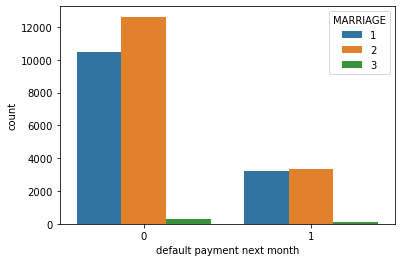

In [29]:
sns.countplot(x = "default payment next month", hue = "MARRIAGE", data = df1)
plt.show()

#### 'AGE' and 'LIMIT_BAL'

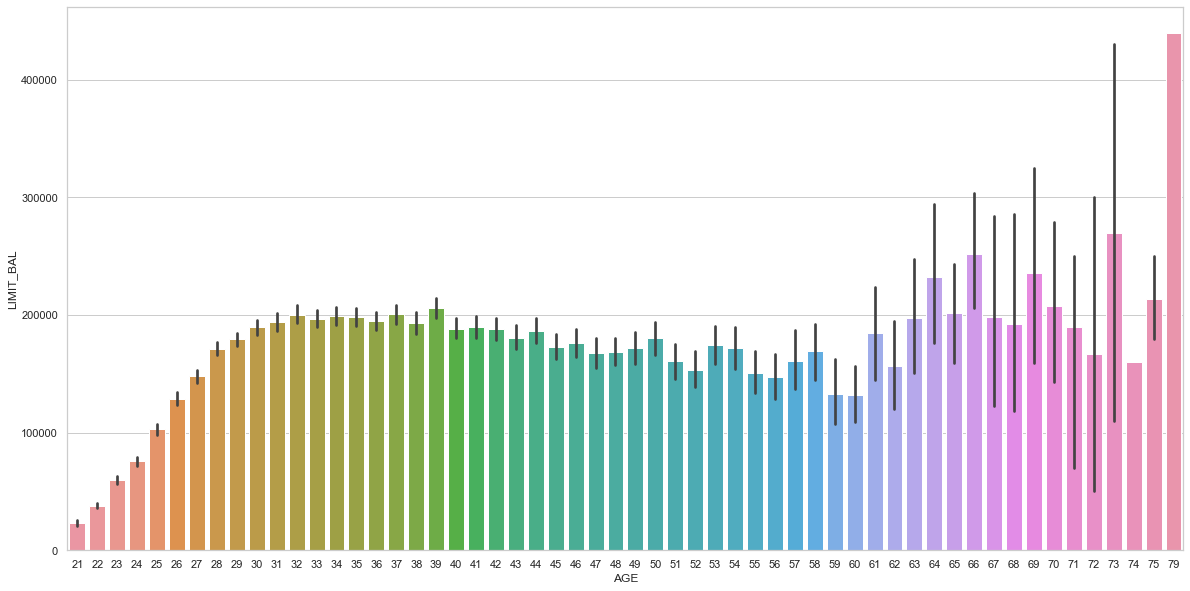

In [30]:
plt.figure(figsize=(20,10))
sns.set(style="whitegrid")
sns.barplot(df1.AGE,df1["LIMIT_BAL"])
plt.show()

## Correlation Matrix

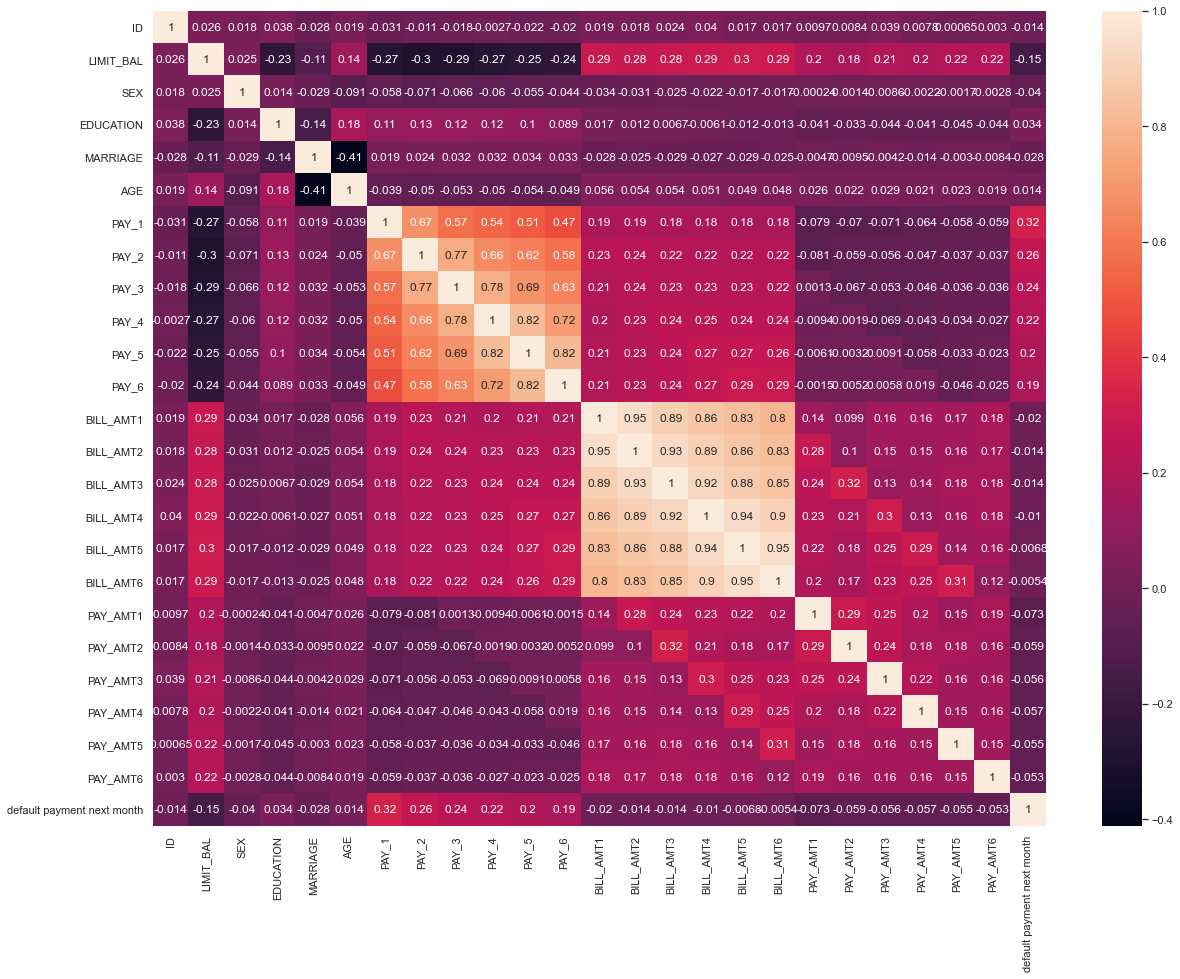

In [31]:
corr = df1.corr()
plt.figure(figsize=(20,15))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True)
plt.show()

## Correlation of Dependent variable with all the independent variables.

In [32]:
X = df1.drop(["default payment next month"],axis = 1)
y = df1["default payment next month"]

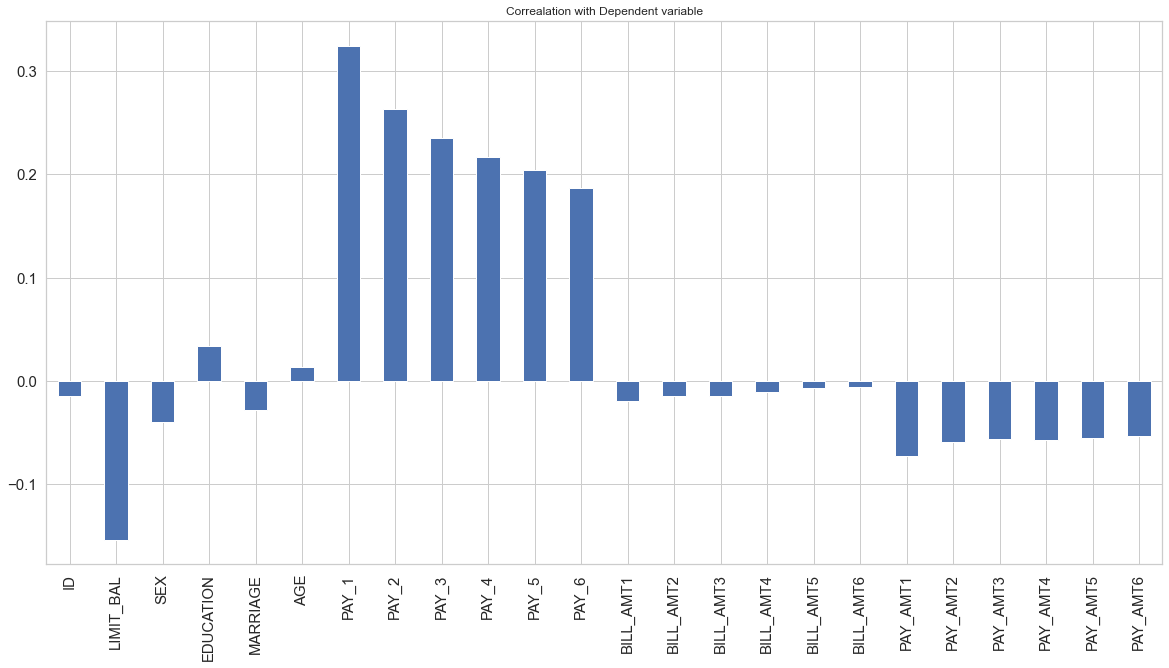

In [33]:
X.corrwith(y).plot.bar(figsize=(20,10),title="Correalation with Dependent variable",fontsize=15,grid=True)

We drop the variables with very less correlation.

In [34]:
X = X.drop(["ID","MARRIAGE","AGE","BILL_AMT1","BILL_AMT2","BILL_AMT3","BILL_AMT4","BILL_AMT5","BILL_AMT6"],axis=1)

### Scaling the data

In [35]:
from sklearn.preprocessing import StandardScaler
scaling=StandardScaler()
X=df1.drop(['default payment next month'],axis=1)
X=scaling.fit_transform(X)

### Train-Test Split

In [36]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=10)

## Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

lr1 = LogisticRegression(class_weight="balanced")
lr1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
print('classes: ',lr1.classes_)
print('coefficients: ',lr1.coef_)
print('intercept :',lr1.intercept_)

classes:  [0 1]
coefficients:  [[-2.62013618e-02 -9.53147392e-02 -5.73891963e-02 -5.48993919e-02
  -8.56802784e-02  7.48431562e-02  5.67053687e-01  1.15632717e-01
   9.26739848e-02  1.98965805e-02  1.73632694e-02 -5.64198194e-03
  -3.86200076e-01  2.06845683e-01  7.04785721e-02  4.42988920e-02
  -3.68922525e-02 -2.15197269e-04 -2.31583261e-01 -1.97746938e-01
  -4.67336566e-02 -6.38802976e-02 -3.56339157e-02 -1.62792123e-02]]
intercept : [-0.19628016]


In [39]:
"""
Predict will give either 0 or 1 as output
Predict_proba will give the only probability of 1.
"""

'\nPredict will give either 0 or 1 as output\nPredict_proba will give the only probability of 1.\n'

In [40]:
pred1 = lr1.predict(X_test)
pred1

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
lr1.predict_proba(X_test)

array([[0.770045  , 0.229955  ],
       [0.27926522, 0.72073478],
       [0.77723254, 0.22276746],
       ...,
       [0.63238425, 0.36761575],
       [0.82085487, 0.17914513],
       [0.79926631, 0.20073369]])

In [42]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,f1_score,recall_score,precision_score
print("Logistic Regression: ")
print("\t")

lr1_a = accuracy_score(y_test,pred1)
print("Accuracy : ",lr1_a)

lr1_p = precision_score(y_test,pred1)
print("Precision: ",lr1_p)

lr1_r = recall_score(y_test,pred1)
print("Recall   : ",lr1_r)

lr1_f = f1_score(y_test,pred1)
print("F1-Score : ",lr1_f)

lr1_au = roc_auc_score(y_test,pred1)
print("AUC-Score: ",lr1_au)

Logistic Regression: 
	
Accuracy :  0.6861666666666667
Precision:  0.37343470483005364
Recall   :  0.6340167046317388
F1-Score :  0.47002533070644525
AUC-Score:  0.6674247520596233


In [43]:
con_mat1 = confusion_matrix(y_test,pred1)
print("Logistic Regression Confusion Matrix: ")
print(con_mat1)

Logistic Regression Confusion Matrix: 
[[3282 1401]
 [ 482  835]]


We try with changing the threshold from 0.5 to 0.4

In [44]:
from sklearn.preprocessing import binarize
# binarize - Boolean thresholding of array-like or scipy.sparse matrix
# Threshold - Feature values below or equal to this are replaced by 0, above it by 1.

proba1 = lr1.predict_proba(X_test)
y_pred_threshold = binarize(proba1,threshold = 0.4)
y_pred_threshold

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [45]:
pred2 = y_pred_threshold[:,1]

In [46]:
print("Logistic Regression with Threshold = 0.4: ")
print("\t")

lr2_a = accuracy_score(y_test,pred2)
print("Accuracy : ",lr2_a)

lr2_p = precision_score(y_test,pred2)
print("Precision: ",lr2_p)

lr2_r = recall_score(y_test,pred2)
print("Recall   : ",lr2_r)

lr2_f = f1_score(y_test,pred2)
print("F1-Score : ",lr2_f)

lr2_au = roc_auc_score(y_test,pred2)
print("AUC-Score: ",lr2_au)

Logistic Regression with Threshold = 0.4: 
	
Accuracy :  0.4965
Precision:  0.27376526818906
Recall   :  0.782839787395596
F1-Score :  0.405665945307889
AUC-Score:  0.5994062272446696


In [115]:
print("Confusion Matrix: ")
print("\t")
print(confusion_matrix(y_test,pred2))

Confusion Matrix: 
	
[[1948 2735]
 [ 286 1031]]


## Random Forests

In [67]:
from sklearn.ensemble import RandomForestClassifier

In [82]:
rf1 = RandomForestClassifier(class_weight="balanced",random_state=10)
rf1.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=10, verbose=0,
                       warm_start=False)

In [83]:
rfpred1 = rf1.predict(X_test)

In [119]:
print("Random Forests: ")
print("\t")

rf1_a = accuracy_score(y_test,rfpred1)
print("Accuracy : ",rf1_a)

rf1_p = precision_score(y_test,rfpred1)
print("Precision: ",rf1_p)

rf1_r = recall_score(y_test,rfpred1)
print("Recall   : ",rf1_r)

rf1_f = f1_score(y_test,rfpred1)
print("F1-Score : ",rf1_f)

rf1_au = roc_auc_score(y_test,rfpred1)
print("AUC-Score: ",rf1_au)

Random Forests: 
	
Accuracy :  0.8196666666666667
Precision:  0.6735598227474151
Recall   :  0.3462414578587699
F1-Score :  0.45737211634904706
AUC-Score:  0.6495247434499914


In [85]:
print("Random Forest Confusion Matrix: ")
print(confusion_matrix(y_test,rfpred1))

Random Forest Confusion Matrix: 
[[4462  221]
 [ 861  456]]


## Random Forests with RandomizedSearchCV

In [86]:
from sklearn.model_selection import RandomizedSearchCV

In [87]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(1, 50, num = 2)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree
bootstrap = [True, False]

In [88]:
#Create the random grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [89]:
# Use the random grid to search for best hyperparameters

# First create the base model to tune
rf2 = RandomForestClassifier(class_weight = "balanced")

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf2, param_distributions = param_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state = 10, n_jobs = -1)

# Fit the random search model
rf_random.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 25.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 50.4min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

In [90]:
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [93]:
#Using the best estimators to train the model.
rf3 = rf_random.best_estimator_

In [94]:
rf3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [96]:
rf_pred2 = rf3.predict(X_test)

In [120]:
print("Random Forests with RandomizedSearchCV: ")
print("\t")

rf2_a = accuracy_score(y_test,rf_pred2)
print("Accuracy : ",rf2_a)

rf2_p = precision_score(y_test,rf_pred2)
print("Precision: ",rf2_p)

rf2_r = recall_score(y_test,rf_pred2)
print("Recall   : ",rf2_r)

rf2_f = f1_score(y_test,rf_pred2)
print("F1-Score : ",rf2_f)

rf2_au = roc_auc_score(y_test,rf_pred2)
print("AUC-Score: ",rf2_au)

Random Forests with RandomizedSearchCV: 
	
Accuracy :  0.822
Precision:  0.65389369592089
Recall   :  0.40167046317388005
F1-Score :  0.49764816556914393
AUC-Score:  0.6709398653687039


In [101]:
print(confusion_matrix(y_test,rf_pred2))

[[4403  280]
 [ 788  529]]


## XGBoost with RandomizedSearchCV

In [100]:
from xgboost import XGBClassifier

In [102]:
# Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [103]:
xgb1 = XGBClassifier()

In [104]:
xg_model1 = RandomizedSearchCV(xgb1,param_distributions=params,n_iter=5,n_jobs=-1,cv=5,verbose=3)
# Fit the random search model
xg_model1.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   50.0s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid='deprecated', n_iter=5, n_jo

In [106]:
xg_model1.best_params_

{'min_child_weight': 3,
 'max_depth': 4,
 'learning_rate': 0.1,
 'gamma': 0.2,
 'colsample_bytree': 0.4}

In [107]:
#Using the best estimators to train the model.
xg_model2 = xg_model1.best_estimator_

In [108]:
xg_model2.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.2, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=4,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [109]:
xg_pred1 = xg_model2.predict(X_test)

In [121]:
print("XGBoost Classifier with RandomizedSearchCV: ")
print("\t")

xg1_a = accuracy_score(y_test,xg_pred1)
print("Accuracy : ",xg1_a)

xg1_p = precision_score(y_test,xg_pred1)
print("Precision: ",xg1_p)

xg1_r = recall_score(y_test,xg_pred1)
print("Recall   : ",xg1_r)

xg1_f = f1_score(y_test,xg_pred1)
print("F1-Score : ",xg1_f)

xg1_au = roc_auc_score(y_test,xg_pred1)
print("AUC-Score: ",xg1_au)

XGBoost Classifier with RandomizedSearchCV: 
	
Accuracy :  0.8253333333333334
Precision:  0.6946454413892909
Recall   :  0.36446469248291574
F1-Score :  0.4780876494023904
AUC-Score:  0.6597040524127156


## Summary

In [123]:
data = [
    ["Logistic Regression",lr1_a,lr1_p,lr1_r,lr1_f,lr1_au],
    ["Logistic Regression (Threshold = 0.4)",lr2_a,lr2_p,lr2_r,lr2_f,lr2_au],
    ["Random Forests",rf1_a,rf1_p,rf1_r,rf1_f,rf1_au],
    ["Random Forests with RandomizedSearchCV",rf2_a,rf2_p,rf2_r,rf2_f,rf2_au],
    ["XGBoost Classifier with RandomizedSearchCV",xg1_a,xg1_p,xg1_r,xg1_f,xg1_au]  
       ]
summary = pd.DataFrame(data,columns = ["Algorithms","Accuracy","Precision","Recall","F1-score","AUC-score"])
summary

,Algorithms,Accuracy,Precision,Recall,F1-score,AUC-score
0,Logistic Regression,0.686167,0.373435,0.634017,0.470025,0.667425
1,Logistic Regression (Threshold = 0.4),0.496500,0.273765,0.782840,0.405666,0.599406
2,Random Forests,0.819667,0.673560,0.346241,0.457372,0.649525
3,Random Forests with RandomizedSearchCV,0.822000,0.653894,0.401670,0.497648,0.670940
4,XGBoost Classifier with RandomizedSearchCV,0.825333,0.694645,0.364465,0.478088,0.659704


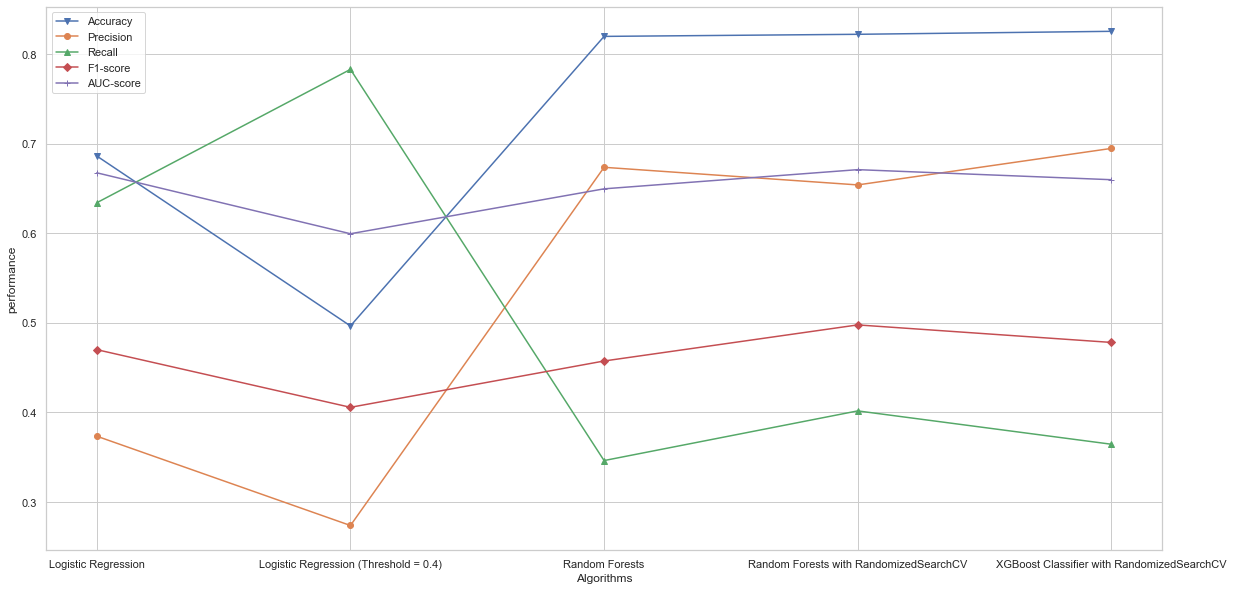

In [130]:
plt.figure(figsize=(20,10))
plt.plot(summary['Algorithms'], summary['Accuracy'], marker='v')
plt.plot(summary['Algorithms'], summary['Precision'], marker='o')
plt.plot(summary['Algorithms'], summary['Recall'], marker='^')
plt.plot(summary['Algorithms'], summary['F1-score'], marker='D')
plt.plot(summary['Algorithms'], summary['AUC-score'], marker='+')
plt.xlabel('Algorithms')
plt.ylabel('performance')
plt.legend(["Accuracy","Precision","Recall","F1-score","AUC-score"])